# Fraud Detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

# Data Acquisition

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "AIML Dataset.csv"

dataset = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "amanalisiddiqui/fraud-detection-dataset",
  file_path,
)

Using Colab cache for faster access to the 'fraud-detection-dataset' dataset.


In [4]:
dataset.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# Structural Analysis
- Target Variable : isFraud
- Row and columns : (6362620, 11)
- Types of variables :
    - int64: 3
    - float64: 5
    - object_ (strings) : 3
- No missing values
- columns name: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud']
**Considerations**:
- Columns follow consistent naming format (camelCase) → No need to rename columns
- We have categorical variables → Should be one-hot encoded

In [5]:
dataset.shape

(6362620, 11)

In [6]:
dataset.columns.values

array(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud'], dtype=object)

In [7]:
dataset.dtypes.sort_values(), dataset.dtypes.value_counts()

(step                int64
 isFraud             int64
 isFlaggedFraud      int64
 amount            float64
 oldbalanceOrg     float64
 newbalanceOrig    float64
 oldbalanceDest    float64
 newbalanceDest    float64
 type               object
 nameOrig           object
 nameDest           object
 dtype: object,
 float64    5
 int64      3
 object     3
 Name: count, dtype: int64)

## Missing values

- No missing values

In [8]:
dataset.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


## Duplicates

**Observations**: With very simplistic verification, it seems that there is no duplicated entries.

**Action Taken**: None

**Consideration**: Pay attention whether duplicates exists in further analysis

In [9]:
dataset.duplicated(subset=["nameOrig", "nameDest", "amount"]).sum()

np.int64(0)

# Statistical Analysis

## Descriptive Analysis


**Observations**:
- Quantitative variables has huge value range (0 to 9e+07)

**Actions Taken**:

**Considerations**:
- Studied variables should be log transformed for better visualisation.

In [10]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Distribution Analysis

**Analysis**:
- Count/Ratio of target class
- Type distribution
- Fraud distributions
- Amount Distribution per Type

**Observations**:
- Highly Unbalanced dataset (~0.13% of fraud transactions)
- Despite the very little percentage we have several thousands of fraud transactions

**Considerations**
- Imbalanced dataset → recall/precision/F1 metrics, stratified split and cross-validation strategies, weighed loss function

In [50]:
# Target feature ratio

pd.concat(
    [
        dataset['isFraud'].value_counts(),
        dataset['isFraud'].value_counts(normalize=True)
    ],
    axis=1
)


,count,proportion
isFraud,,
0,6354407,0.998709
1,8213,0.001291


### Distribution of Types

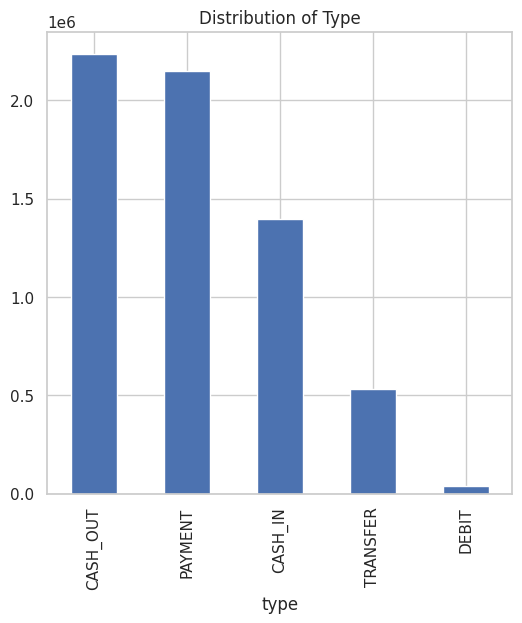

In [12]:
dataset['type'].value_counts().plot(
  kind="bar",
    figsize=(6, 6),
    title='Distribution of Type',
)
plt.show()


### Fraud Distribution

Observation:
- Frauds include mainly Transfer, then cash-out operations.
- Frauds involves transactions with higher amounts

Action taken:
- Log Transform of the amount

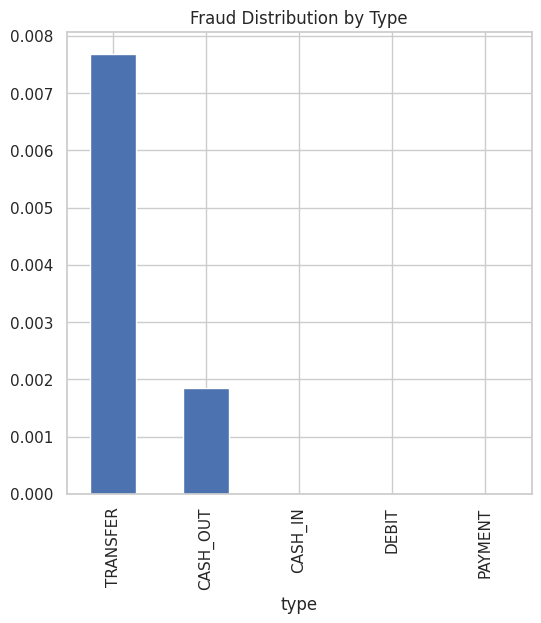

In [13]:
fraud_by_type = dataset.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(
    kind='bar',
    figsize=(6, 6),
    title='Fraud Distribution by Type',
)
plt.show()

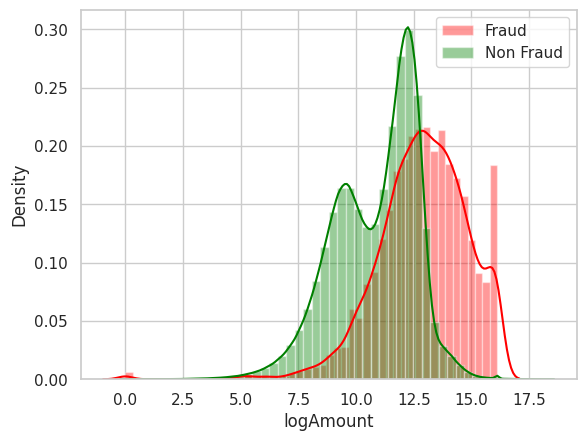

In [16]:
dataset['logAmount'] = np.log1p(dataset['amount'])

# Fraud vs non fraud amounts distribution
sns.distplot(
    dataset[dataset['isFraud'] == 1]['logAmount'],
    label='Fraud',
    color='red',
)
sns.distplot(
    dataset[dataset['isFraud'] == 0]['logAmount'],
    label='Non Fraud',
    color='green',
)
plt.legend()
plt.show()

### Distribution of transaction amounts

<Figure size 1000x500 with 0 Axes>

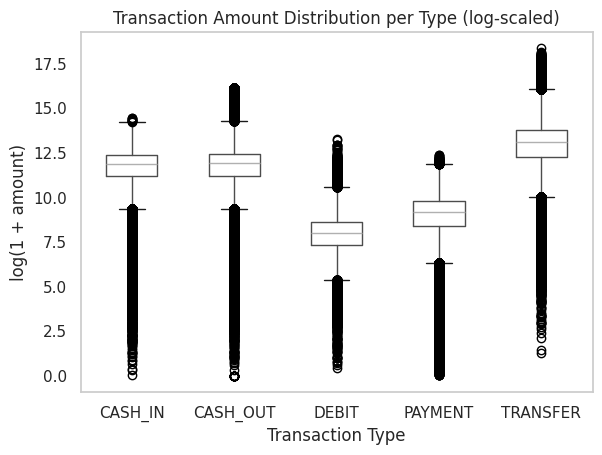

In [17]:
plt.figure(figsize=(10, 5))
dataset.boxplot(
    column='logAmount',
    by='type',
    grid=False
)

plt.title('Transaction Amount Distribution per Type (log-scaled)')
plt.suptitle('')
plt.xlabel('Transaction Type')
plt.ylabel('log(1 + amount)')
plt.show()


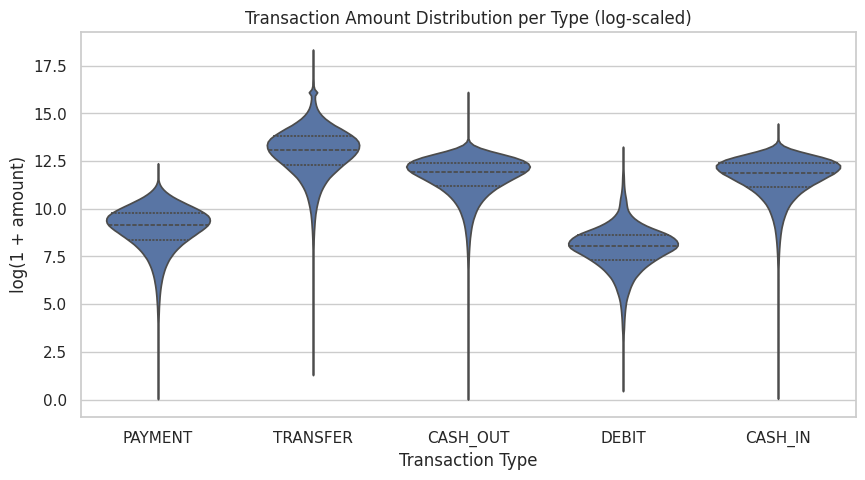

In [18]:
plt.figure(figsize=(10, 5))
sns.violinplot(
    data=dataset,
    x='type',
    y='logAmount',
    inner='quartile',
    cut=0
)

plt.title('Transaction Amount Distribution per Type (log-scaled)')
plt.xlabel('Transaction Type')
plt.ylabel('log(1 + amount)')
plt.show()


<Figure size 640x480 with 0 Axes>

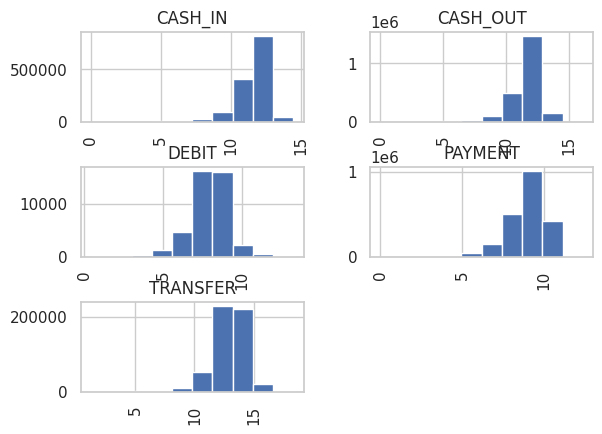

In [19]:
plt.figure()
dataset.hist(
    column='logAmount',
    by='type',
    grid=False
)

plt.title('Transaction Amount Distribution per Type (log-scaled)')
plt.suptitle('')
plt.xlabel('Transaction Type')
plt.ylabel('log(1 + amount)')
plt.show()


# Qualitative Analysis

## Account Type Prefixes (nameOrig / nameDest)

**Analysis**:
- Account Prefix count/proportion
- Account type of transaction origin and destination count
- fraud count and rate by origin and destination combination

**Observations**:
- Account names starting with `C` are customer accounts; `M` are merchant accounts.
- All transactions originates from customer account
- Fraudulent transactions should only involve C→C transfers (merchants shouldn't be fraud destinations since their balances aren't tracked).
- Merchant accounts have `oldbalanceDest` and `newbalanceDest` equal 0

**Action Taken**:
- Extract prefix feature for later use in modeling.
- `nameOrig` and `nameDest` columns were added.

**Considerations**:
- `nameOrig` and `nameDest` as raw strings are not directly usable by a model (too high cardinality). The prefix (`C`/`M`) is the useful signal.

- Since all `nameOrig` starts with `C`, `origType` has zero variance and can be dropped.
- `destType` (C vs M) can be a useful binary feature for the model.

In [20]:
# Account prefix
dataset['origType'] = dataset['nameOrig'].str[0]
dataset['destType'] = dataset['nameDest'].str[0]

print("Origin account types:")
print(dataset['origType'].value_counts())
print()
print("Destination account types:")
print(dataset['destType'].value_counts())


Origin account types:
origType
C    6362620
Name: count, dtype: int64

Destination account types:
destType
C    4211125
M    2151495
Name: count, dtype: int64


In [32]:
# Fraud rate by account type combination
combo = dataset.groupby(['origType', 'destType'])['isFraud'].agg(['sum', 'mean', 'count'])
combo.columns = ['fraud_count', 'fraud_rate', 'total']
combo.sort_values('fraud_rate', ascending=False)


fraud_count  fraud_rate    total
origType destType                                  
C        C                8213     0.00195  4211125
         M                   0     0.00000  2151495

## isFlaggedFraud Analysis

**Analysis**:
- Cross-tabulation of `isFlaggedFraud` with `isFraud`

**Observations**:
- `isFlaggedFraud` is an existing rule-based flag in the system that flags some transactions. However, not enough since it only captures 0.19% of true positives.

**Action Taken**: None

**Considerations**:
- `isFlaggedFraud` will be dropped before modeling as it is a leaky and unreliable system variable, not a true feature.

In [41]:
dataset[dataset['isFlaggedFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,logAmount,origType,destType
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1,15.415685,C,C
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1,14.110419,C,C
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1,13.193056,C,C
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1,15.403151,C,C
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1,16.118096,C,C
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1,16.075714,C,C
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1,15.089839,C,C
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1,12.776700,C,C
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1,14.748723,C,C
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1,16.118096,C,C


In [39]:
# Contingency table of Flagged Fraud and Fraudulent transations
ct = pd.crosstab(dataset['isFlaggedFraud'], dataset['isFraud'], margins=True)
ct.index = ['Not Flagged', 'Flagged', 'Total']
ct.columns = ['Not Fraud', 'Fraud', 'Total']
print(ct)
print()

# how many actual frauds are caught by the flag?
flagged_fraud = dataset[(dataset['isFlaggedFraud']==1) & (dataset['isFraud']==1)].shape[0]
total_fraud = dataset['isFraud'].sum()
print(f"isFlaggedFraud catches {flagged_fraud}/{total_fraud} actual frauds ({flagged_fraud/total_fraud*100:.2f}%)")


             Not Fraud  Fraud    Total
Not Flagged    6354407   8197  6362604
Flagged              0     16       16
Total          6354407   8213  6362620

isFlaggedFraud catches 16/8213 actual frauds (0.19%)


# Temporal Analysis

## Fraud over Time (step)

**Analysis**:
- Total transaction per step (hours) time series

**Observations** :
- `step` represents a period intervals → Assumptions is about 1-hour time interval over ~30 days (743 steps total).
- Examining fraud counts and rates over time reveal temporal patterns (some periodicity).
- The number of transactions decrease second half of the period.

**Action Taken**: None.

**Considerations**:
- It is interesting to consider `step` as-is as a numeric feature or engineer it into hour-of-day / day-of-week proxies (step % 24, step // 24).

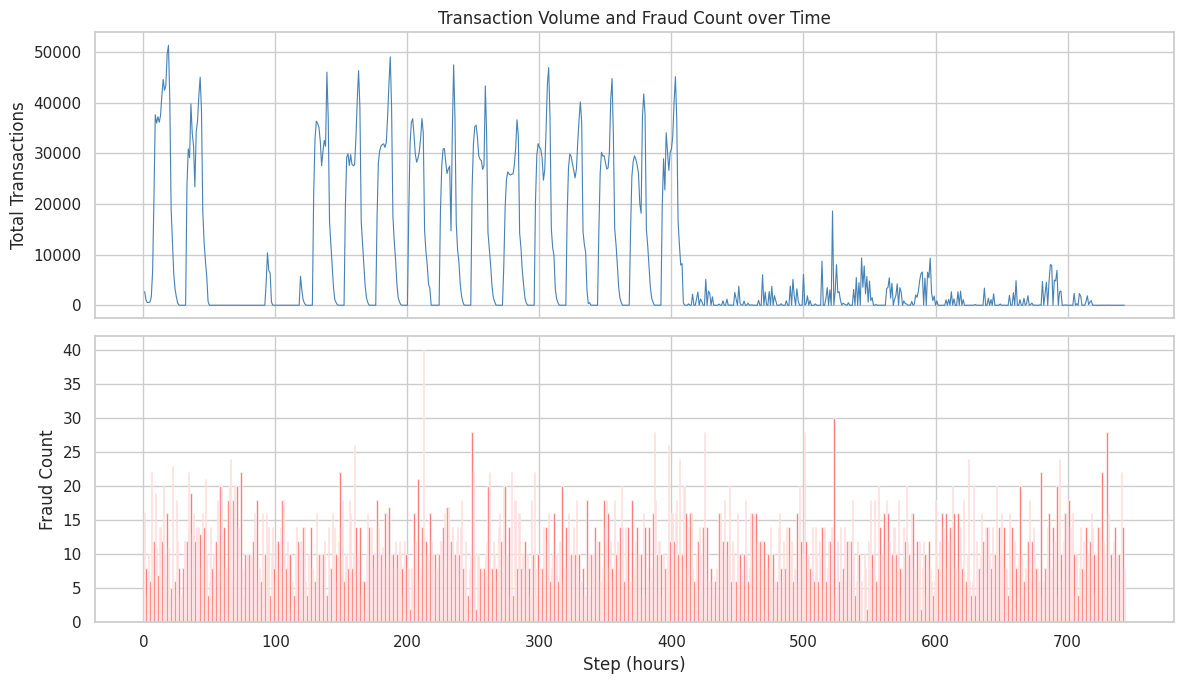

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

# total transactions per step
step_total = dataset.groupby('step').size()
step_fraud = dataset[dataset['isFraud']==1].groupby('step').size()

axes[0].plot(step_total.index, step_total.values, color='steelblue', linewidth=0.8)
axes[0].set_ylabel('Total Transactions')
axes[0].set_title('Transaction Volume and Fraud Count over Time')

axes[1].bar(step_fraud.index, step_fraud.values, color='red', alpha=0.7, width=1)
axes[1].set_ylabel('Fraud Count')
axes[1].set_xlabel('Step (hours)')

plt.tight_layout()
plt.show()


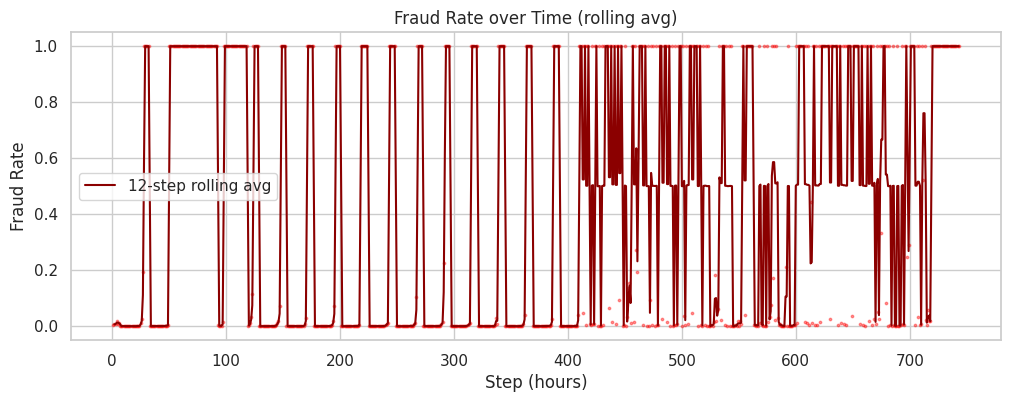

In [49]:
# fraud rate per step rolling avg
step_rate = (step_fraud / step_total).fillna(0)
plt.figure(figsize=(12, 4))
plt.plot(step_rate.index, step_rate.rolling(2).mean(), color='darkred', label='12-step rolling avg')
plt.scatter(step_rate.index, step_rate.values, s=3, alpha=0.4, color='red')
plt.title('Fraud Rate over Time (rolling avg)')
plt.xlabel('Step (hours)')
plt.ylabel('Fraud Rate')
plt.legend()
plt.show()


# Quantitative Analysis

## Balance Feature Distributions

**Analysis**
- Balance feature distribution (log-scaled)
- Fraud/Non-Fraud balance feature distribution (log-scaled)

**Observations**:
- Many accounts start and end with 0 balance. Excluding these, balance variables follow a bell-shaped distribution.
- `newbalanceOrig` is right-skewed.
- In fraud cases, `newbalanceOrig` is frequently 0 → the account is fully drained.
- Fraudulent transactions appear to drain accounts completely (newbalanceOrig → 0).
- Fraudulent transactions appear to have higher origin balance.

**Action Taken**: None

**Considerations**:
- Log transformation will be needed for balance features too at modeling time.
- Zero values are legitimate and valuable information.
- Hint: Look for balance discrepancy between origin and destination

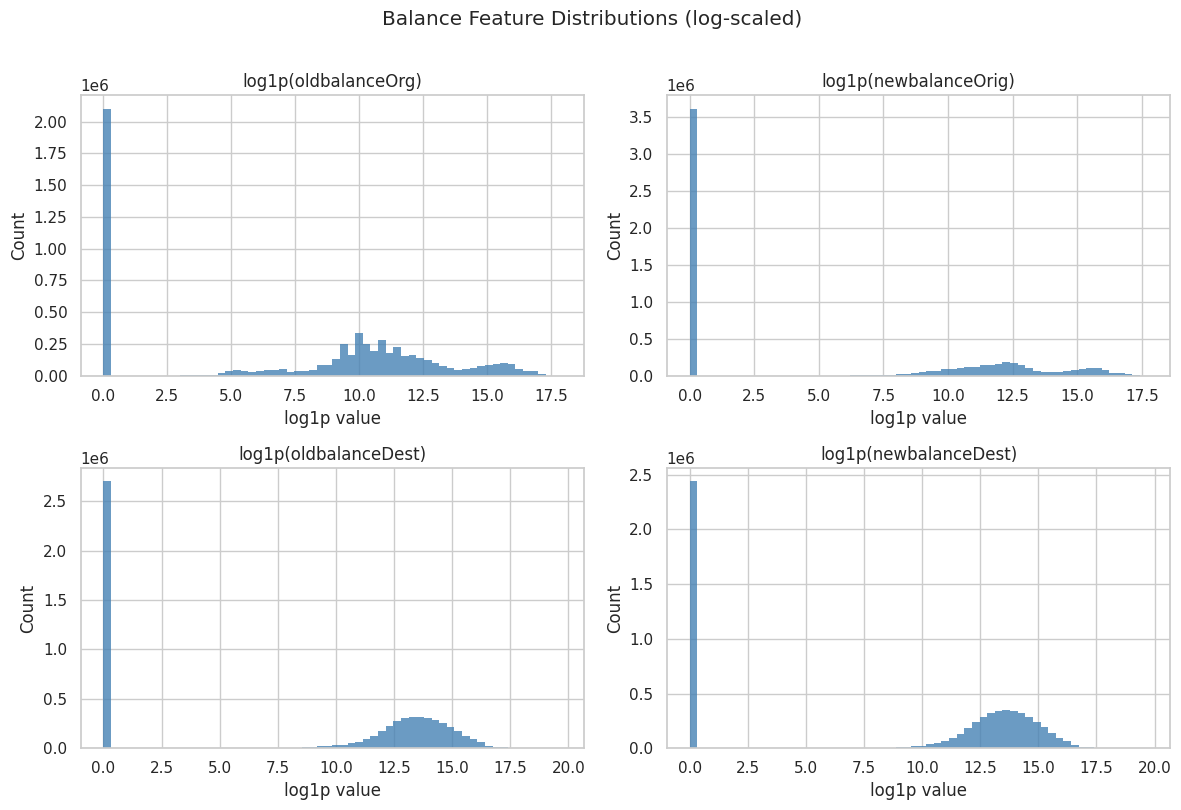

In [55]:
bal_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(bal_cols):
    log_vals = np.log1p(dataset[col])
    axes[i].hist(log_vals, bins=60, color='steelblue', edgecolor='none', alpha=0.8)
    axes[i].set_title(f'log1p({col})')
    axes[i].set_xlabel('log1p value')
    axes[i].set_ylabel('Count')

plt.suptitle('Balance Feature Distributions (log-scaled)', y=1.01)
plt.tight_layout()
plt.show()


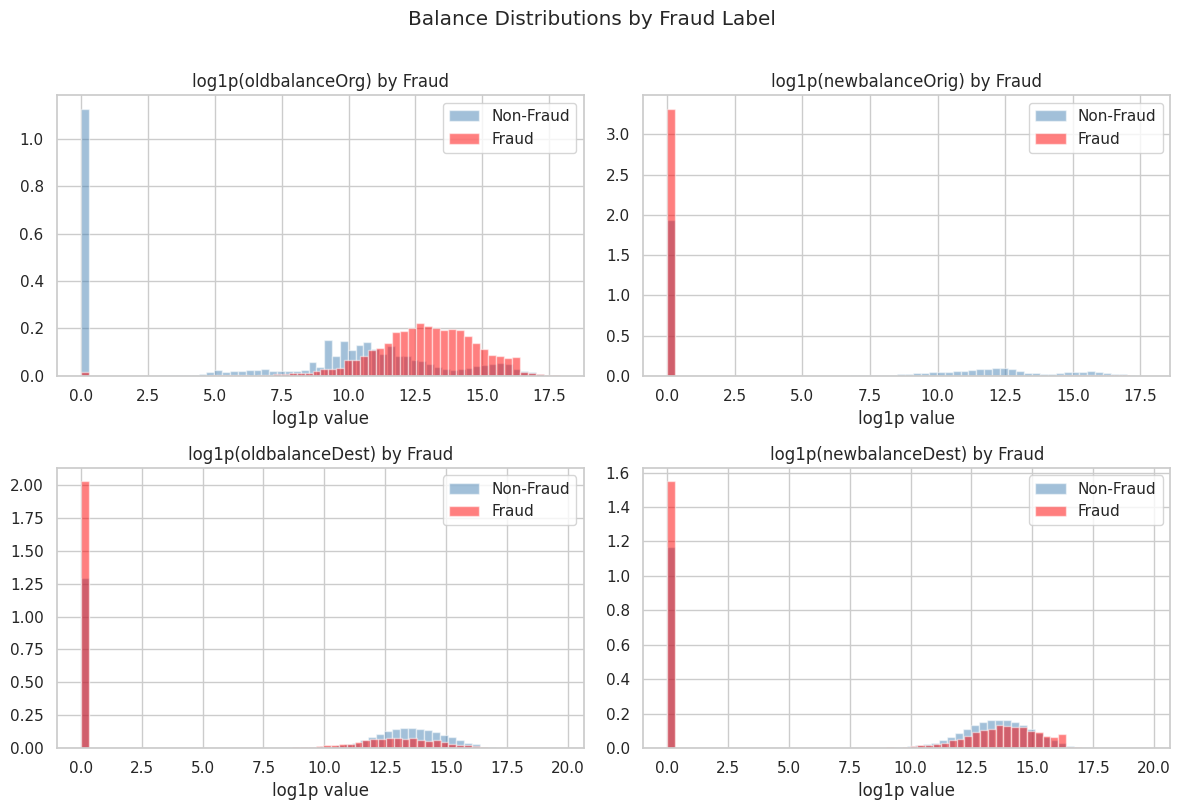

In [57]:
# Balance Features: Fraud vs Non-Fraud

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(bal_cols):
    for label, color in [(0, 'steelblue'), (1, 'red')]:
        vals = np.log1p(dataset[dataset['isFraud']==label][col])
        axes[i].hist(vals, bins=60, alpha=0.5, color=color,
                     label='Fraud' if label else 'Non-Fraud', density=True)
    axes[i].set_title(f'log1p({col}) by Fraud')
    axes[i].legend()
    axes[i].set_xlabel('log1p value')

plt.suptitle('Balance Distributions by Fraud Label', y=1.01)
plt.tight_layout()
plt.show()


## Correlation Analysis

**Observations**:
- High correlation between `oldbalanceOrg`/`newbalanceOrig` and between `oldbalanceDest`/`newbalanceDest` (before/after pairs).
- `amount` show some correlation with balance changes.
- No clear correlation between `isFraud` and raw features.

**Action Taken**: None.

**Considerations**:
- Highly correlated features may cause redundancy. We can consider using balance difference features instead of both before/after values.

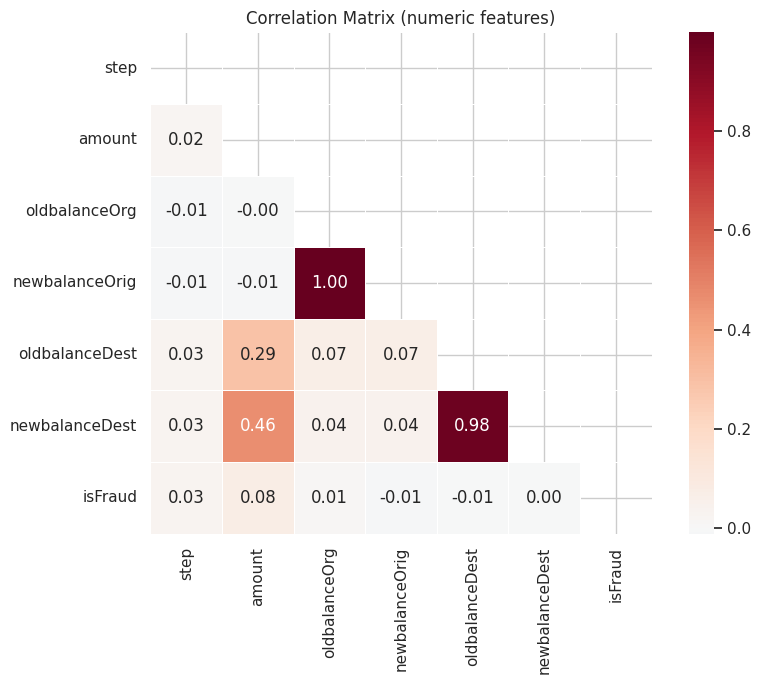

In [58]:
num_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
            'oldbalanceDest', 'newbalanceDest', 'isFraud']

corr = dataset[num_cols].corr()

plt.figure(figsize=(9, 7))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix (numeric features)')
plt.tight_layout()
plt.show()


## Balance Error Analysis

**Analysis**:
- Origin and Destination balance discrepancy count
- Transactions with balance discrepancy lookup
- Transactions with no balance update lookup
- Fraud/Non-Fraud Error Balance feautures
- Balance error distribution (log-scaled)

**Observations**:
- A known anomaly in this dataset: some transactions have discrepancies in origin and destination balance.
- some fraudulent transactions show no update to the destination balance (`newbalanceDest == oldbalanceDest` even though money was sent). However this is not always signaled as fraud.

**Action Taken**: Created `errorBalanceOrig` and `errorBalanceDest` as candidate features.

**Considerations**:
- We can include these two error features for modeling:
  - `errorBalanceOrig = newbalanceOrig + amount - oldbalanceOrg` (should be ~0 for consistent transactions)
  - `errorBalanceDest = oldbalanceDest + amount - newbalanceDest` (should be ~0 for consistent transactions)

In [78]:
# Detect discrepancy in balance features
dataset['errorBalanceOrig'] = dataset['newbalanceOrig'] + dataset['amount'] - dataset['oldbalanceOrg']
dataset['errorBalanceDest'] = dataset['oldbalanceDest'] + dataset['amount'] - dataset['newbalanceDest']

print("errorBalanceOrig:", (dataset["errorBalanceOrig"] != 0).sum())
print("errorBalanceDest:", (dataset["errorBalanceDest"] != 0).sum())
print("errorBalanceOrig excluding Merchant Account:", ((dataset["errorBalanceOrig"] != 0) & (dataset["destType"] != "M")).sum())
print("errorBalanceDest excluding Merchant Account:", ((dataset["errorBalanceDest"] != 0) & (dataset["destType"] != "M")).sum())

errorBalanceOrig: 5212469
errorBalanceDest: 4736674
errorBalanceOrig excluding Merchant Account: 3933386
errorBalanceDest excluding Merchant Account: 2585179


In [75]:
# Detect what type of discrepancy in balance features
error_rows = dataset[
    (dataset["errorBalanceOrig"] != 0) |
    (dataset["errorBalanceDest"] != 0)
]

error_rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,logAmount,origType,destType,errorBalanceOrig,errorBalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9.194276,C,M,0.0,9.839640e+03
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,7.531166,C,M,0.0,1.864280e+03
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,5.204007,C,C,0.0,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,5.204007,C,C,0.0,2.136300e+04
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,9.364703,C,M,0.0,1.166814e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0,12.735768,C,C,0.0,3.396821e+05
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,15.657870,C,C,0.0,6.311409e+06
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,15.657870,C,C,0.0,1.000000e-02
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,13.652996,C,C,0.0,8.500025e+05


In [83]:
# Transactions with no balance update
dataset[
    (dataset["oldbalanceOrg"] == dataset["newbalanceOrig"]) &
    ((dataset["oldbalanceOrg"] != 0) |
    (dataset["newbalanceOrig"] != 0))
].head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,logAmount,origType,destType,errorBalanceOrig,errorBalanceDest
456,1,CASH_IN,110226.34,C1475192960,1601450.63,1601450.63,C1816757085,1601450.63,10681238.79,0,0,11.610300,C,C,110226.34,-8969561.82
656,1,CASH_IN,770537.37,C2015999862,8499043.13,8499043.13,C1883840933,8499043.13,16874643.09,0,0,13.554845,C,C,770537.37,-7605062.59
1292,1,CASH_IN,61505.91,C1790387225,4910403.44,4910403.44,C11003494,4910403.44,10588885.27,0,0,11.026905,C,C,61505.91,-5616975.92
1293,1,CASH_IN,404167.60,C984412970,4910403.44,4910403.44,C11003494,4910403.44,10588885.27,0,0,12.909587,C,C,404167.60,-5274314.23
1591,1,CASH_OUT,30308.45,C1949126165,88926.20,88926.20,C1568059495,88926.20,122750.49,0,0,10.319215,C,C,30308.45,-3515.84
1822,1,TRANSFER,169106.97,C2142129482,575667.54,575667.54,C1170794006,575667.54,22190.99,0,0,12.038293,C,C,169106.97,722583.52
1979,1,CASH_OUT,144659.77,C1936375962,149735.97,149735.97,C757108857,149735.97,0.00,0,0,11.882147,C,C,144659.77,294395.74
2129,1,CASH_IN,42012.45,C1137667747,350501.24,350501.24,C667346055,350501.24,9291619.62,0,0,10.645745,C,C,42012.45,-8899105.93
2246,1,CASH_IN,187256.62,C1106468732,521018.57,521018.57,C662736689,521018.57,4891090.56,0,0,12.140241,C,C,187256.62,-4182815.37
2678,1,CASH_IN,208664.25,C1216611732,4800759.18,4800759.18,C1870252780,4800759.18,7416184.79,0,0,12.248487,C,C,208664.25,-2406761.36


In [79]:
# Fraud/Non-Fraud Error Balance feautures
print("Error Balance Orig — fraud vs non-fraud:")
display(dataset.groupby('isFraud')['errorBalanceOrig'].describe())
print("\n\n")
print("Error Balance Dest — fraud vs non-fraud:")
display(dataset.groupby('isFraud')['errorBalanceDest'].describe())


Error Balance Orig — fraud vs non-fraud:


,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,6354407.0,201338.558109,606928.890826,-1.000000e-02,3034.305,69049.31,249953.43,92445516.64
1,8213.0,10692.325265,265146.131130,-7.450581e-09,0.000,0.00,0.00,10000000.00





Error Balance Dest — fraud vs non-fraud:


,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,6354407.0,54692.231734,4.360026e+05,-75885725.63,0.0,3500.68,29259.805,13191233.98
1,8213.0,732509.301069,1.867748e+06,-8875516.29,0.0,2231.46,442722.010,10000000.00


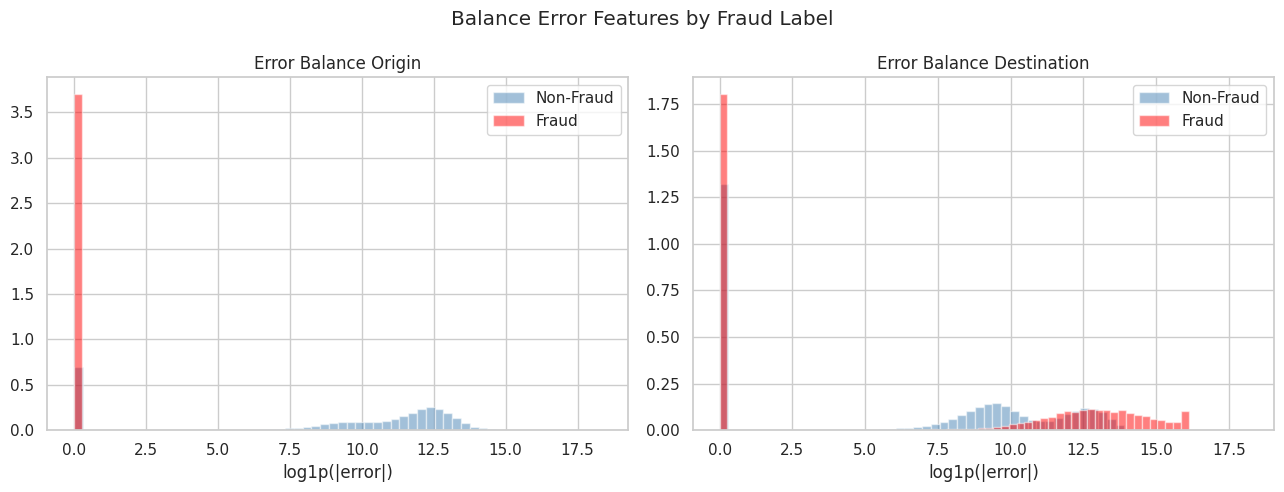

In [60]:
# Balance error distribution (log-scaled)
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

for ax, col, title in zip(axes,
                           ['errorBalanceOrig', 'errorBalanceDest'],
                           ['Error Balance Origin', 'Error Balance Destination']):
    for label, color in [(0, 'steelblue'), (1, 'red')]:
        vals = np.log1p(np.abs(dataset[dataset['isFraud']==label][col]))
        ax.hist(vals, bins=60, alpha=0.5, color=color,
                label='Fraud' if label else 'Non-Fraud', density=True)
    ax.set_title(title)
    ax.set_xlabel('log1p(|error|)')
    ax.legend()

plt.suptitle('Balance Error Features by Fraud Label')
plt.tight_layout()
plt.show()


## Outlier Analysis

**Observations**:
- The dataset contains very large transactions (amount up to ~92M). These may be legitimate high-value transfers or anomalies.
- Fraudulent transactions includes excessively high amount transaction.

**Action Taken**: None → no outliers removed.

**Considerations**:
- Keeping outliers is likely a good value for modeling stage.

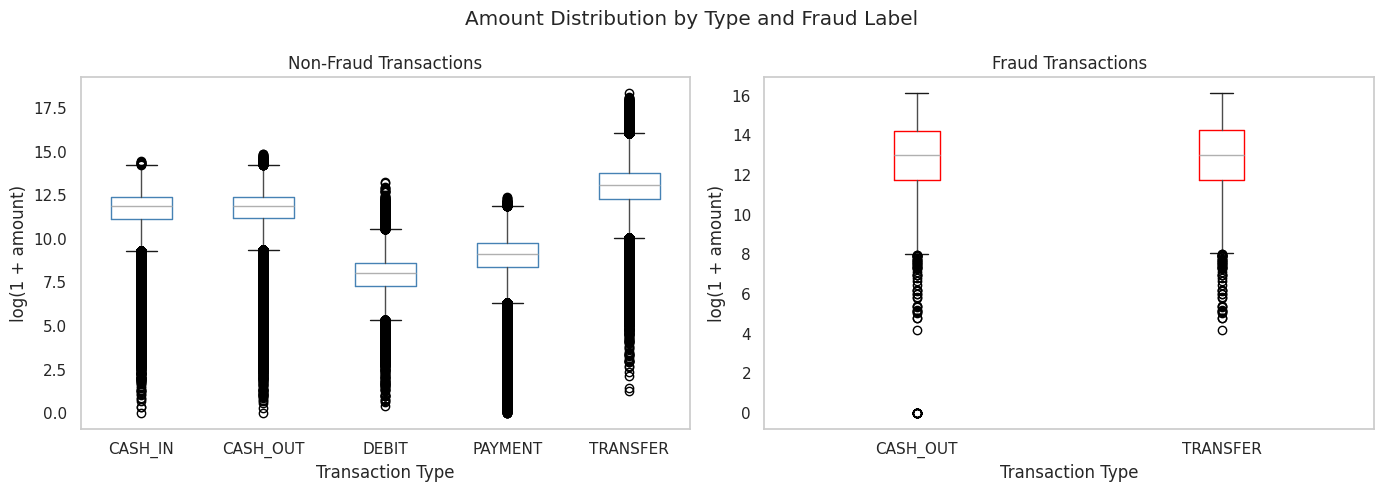

In [85]:
# amount outliers per type, split by fraud label
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, fraud_label, title in zip(axes, [0, 1], ['Non-Fraud Transactions', 'Fraud Transactions']):
    sub = dataset[dataset['isFraud']==fraud_label]
    sub.boxplot(column='logAmount', by='type', ax=ax, grid=False,
                boxprops=dict(color='steelblue' if fraud_label==0 else 'red'))
    ax.set_title(title)
    ax.set_xlabel('Transaction Type')
    ax.set_ylabel('log(1 + amount)')

plt.suptitle('Amount Distribution by Type and Fraud Label')
plt.tight_layout()
plt.show()


## Fraud Deep-Dive by Transaction Type

**Observations**:
- Fraud only occurs in TRANSFER and CASH_OUT transactions. PAYMENT, DEBIT, and CASH_IN never have fraudulent transactions in this dataset.
- This is the most important structural insight for feature engineering and model interpretation.

**Action Taken**: None at this stage. Will filter or flag during preprocessing.

**Considerations**:
- Could train separate models per transaction type, or add `type` as a one-hot encoded feature. The latter is simpler and likely sufficient.
- PAYMENT/DEBIT/CASH_IN transactions have isFraud=0 uniformly — the model could learn this perfectly from the `type` feature alone.

          fraud_count  fraud_rate  total_count
type                                          
TRANSFER         4097    0.007688       532909
CASH_OUT         4116    0.001840      2237500
CASH_IN             0    0.000000      1399284
DEBIT               0    0.000000        41432
PAYMENT             0    0.000000      2151495



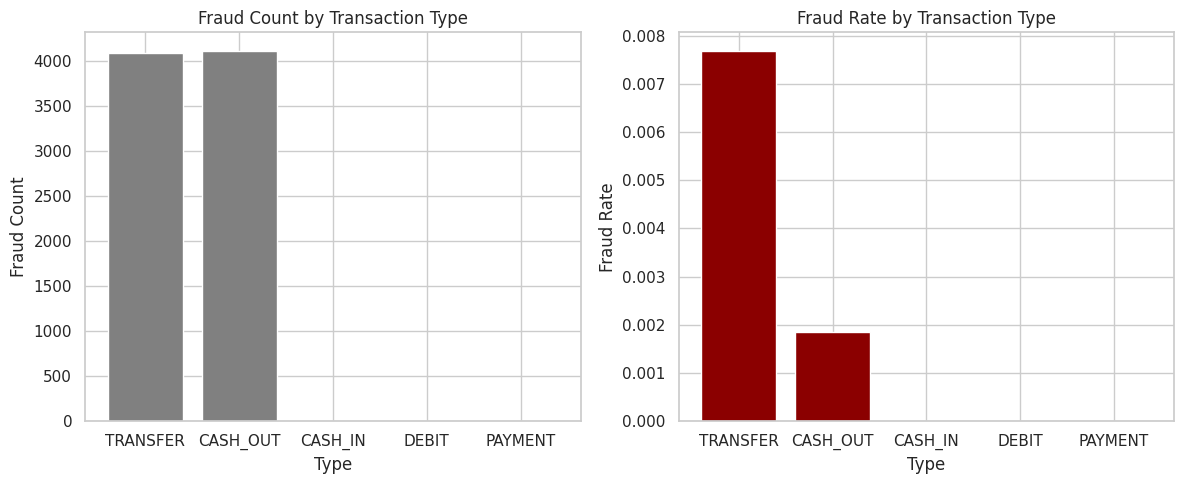

In [87]:
fraud_type = dataset.groupby('type')['isFraud'].agg(['sum','mean','count'])
fraud_type.columns = ['fraud_count', 'fraud_rate', 'total_count']
fraud_type = fraud_type.sort_values('fraud_rate', ascending=False)
print(fraud_type)
print()

# visual
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(fraud_type.index, fraud_type['fraud_count'], color='gray')
axes[0].set_title('Fraud Count by Transaction Type')
axes[0].set_ylabel('Fraud Count')
axes[0].set_xlabel('Type')

axes[1].bar(fraud_type.index, fraud_type['fraud_rate'], color='darkred')
axes[1].set_title('Fraud Rate by Transaction Type')
axes[1].set_ylabel('Fraud Rate')
axes[1].set_xlabel('Type')

plt.tight_layout()
plt.show()


## Zero-Balance Origin Pattern

**Observations**:
- A large share of fraud transactions completely drain the origin account (`newbalanceOrig == 0`).
- Similarly, many fraud cases have `oldbalanceOrg == amount` (exact drain), which is a very specific behavioral pattern.

**Action Taken**: None

**Considerations**:
- `isOrigDrained` (binary: newbalanceOrig == 0) could be a strong engineered feature.

In [89]:
# what % of fraud vs non-fraud has newbalanceOrig == 0
for label in [0, 1]:
    sub = dataset[dataset['isFraud']==label]
    pct_zero = (sub['newbalanceOrig']==0).mean() * 100
    print(f"isFraud={label}: {pct_zero:.1f}% have newbalanceOrig == 0")

print()
# exact drain: oldbalanceOrg == amount
for label in [0, 1]:
    sub = dataset[dataset['isFraud']==label]
    pct_exact = np.isclose(sub['oldbalanceOrg'], sub['amount']).mean() * 100
    print(f"isFraud={label}: {pct_exact:.1f}% have oldbalanceOrg ≈ amount (exact drain)")


isFraud=0: 56.7% have newbalanceOrig == 0
isFraud=1: 98.1% have newbalanceOrig == 0

isFraud=0: 0.0% have oldbalanceOrg ≈ amount (exact drain)
isFraud=1: 97.8% have oldbalanceOrg ≈ amount (exact drain)


# EDA Summary & Pre-Modeling

## Key Findings

**Class Imbalance**: Target variable `isFraud` is heavily imbalanced (~0.13% fraud rate). Requires stratified splits, appropriate metrics (precision/recall/F1, AUC-PR), and potentially class weighting or resampling.

**Transaction Types**: Fraud is exclusive to TRANSFER and CASH_OUT types. This is the single strongest categorical signal.

**Balance Patterns**: Fraudulent transactions frequently drain the origin account completely. The destination balances are often inconsistently updated in fraud cases captured by the `errorBalanceDest` feature.

**Temporal Patterns**: Fraud is distributed across time steps but may show periodic patterns worth exploring further.

**isFlaggedFraud**: The existing rule-based flag captures only a tiny fraction of actual fraud — it should be excluded from model features (leakage risk, poor recall).

## Feature Engineering Summary

| Feature | Type | Source |
|---|---|---|
| `log_amount` | Numeric | log1p(amount) |
| `errorBalanceOrig` | Numeric | newbalanceOrig + amount - oldbalanceOrg |
| `errorBalanceDest` | Numeric | oldbalanceDest + amount - newbalanceDest |
| `destType` | Binary (C/M) | nameDest prefix |
| `type` | Categorical (OHE) | transaction type |
| `step` | Numeric | as-is or cyclic encoding |

## Columns to Drop Before Modeling
- `nameOrig`, `nameDest` — high cardinality identifiers, no direct signal
- `isFlaggedFraud` — leakage / misleading
- `origType` — zero variance (all C)
- `amount` — replaced by `log_amount`

## Models to explore
- Logistic Regression (baseline)
- Tree-based models → RandomForestClassifier
- Boosting → XGBoost
